In [2]:
using DataFrames, FileIO, DelimitedFiles
using Plots, Optim, LsqFit, JUMD
using Statistics, NamedArrays

In [3]:
# Get ready
dir_ctv_watlig = "/home/pbarletta/labo/20/reobp/run/ctv/watlig"

aa = 119
nstlim = 12000
phs = collect(2.0:.5:7.5)
idx = collect(1:12)

titrable_resis = [4, 5, 11, 13, 20, 24, 30, 33, 37, 39, 40,
    48, 58, 73, 77, 78, 87, 93, 94, 97, 117]
titrable_resnames = ["GL4", "GL4", "HIP", "GL4", "GL4", "AS4",
    "AS4", "GL4", "AS4", "GL4", "AS4", "GL4", "AS4", "GL4", "AS4",
    "GL4", "AS4", "GL4", "GL4", "HIP", "AS4"]
titrable_cnt = length(titrable_resis)

idx_of_titrable = fill(0, aa)
[ idx_of_titrable[titrable_resis[i]] = i for i in 1:titrable_cnt ];

titrable_residues = [ string(titrable_resnames[i], "_", titrable_resis[i]) 
    for i in 1:titrable_cnt ];

In [5]:
for i in 1:12
    PH = convert(Int64, phs[i] * 10)
    global watlig_phs = convert(Array{Float64, 1},
    readdlm(joinpath(dir_ctv_watlig, string(phs[i]), "close_wat.dat"))[2:end, 3])

    sym_watlig_phs = Symbol("watlig_dist_", PH)
    eval(:($sym_watlig_phs = watlig_phs))
end

## N1 distance to closest water

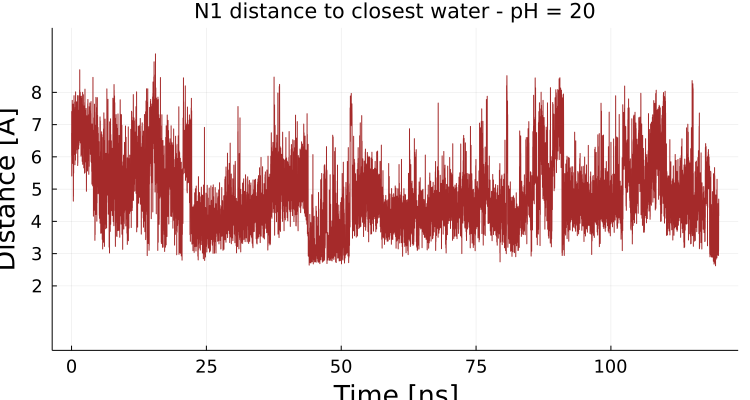

In [11]:
min_dist = 0
max_dist = 10
plot(collect(1:nstlim) ./ 100, watlig_dist_20,
    title = string("N1 distance to closest water - pH = ", 20), size = (750, 400),
    ylims = (min_dist, max_dist), label = false,
    yticks = collect(2:1:8),
    linecolor = Colors.colorant"Brown",
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    yaxis = "Distance [A]", xaxis = "Time [ns]")

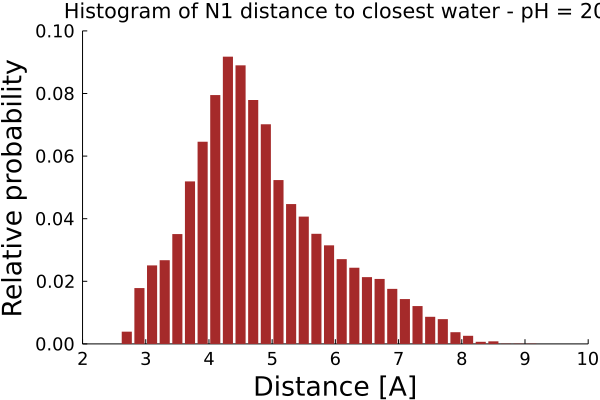

In [21]:
st = .2
bin_watlig = collect(min_dist:st:max_dist)
wgh_watlig = fill(1.0, length(watlig_dist_20))

# Histograma ponderado
Wbins_watlig, Whis_watlig = JUMD.weightedHist(watlig_dist_20, bin_watlig, wgh_watlig, true, false);

bar(Wbins_watlig, Whis_watlig,
    xlims = (st*10, max_dist), ylims = (0, .1),
    xticks = st*10:st*5:max_dist+st,
    linecolor = false, fillcolor = Colors.colorant"Brown",
    grid = false, legend = false,
    guidefont = font(18, "Arial"), tickfont = font(12, "Arial"),
    legendfont = font(12, "Arial"),
    title = string("Histogram of N1 distance to closest water - pH = ", 20),
    yaxis = "Relative probability", xaxis = "Distance [A]")

In [24]:
vals = vcat([ mean(watlig_dist_20) std(watlig_dist_20) std(watlig_dist_20) / mean(watlig_dist_20) ],
    [ mean(watlig_dist_25) std(watlig_dist_25) std(watlig_dist_25) / mean(watlig_dist_25) ],
    [ mean(watlig_dist_30) std(watlig_dist_30) std(watlig_dist_40) / mean(watlig_dist_40) ])
    
NamedArray(vals, (string.(phs[1:3]), ["μ" ; "std" ; "μ/std"]))

3×3 Named Matrix{Float64}
A ╲ B │        μ       std     μ/std
──────┼─────────────────────────────
2.0   │  4.83891   1.11454  0.230329
2.5   │  6.98185   1.20122  0.172049
3.0   │  5.75674   1.73847  0.137257